### Student Information

Name: 王斾頤

Student ID: 112065522

GitHub ID: 107053143


---


### Instructions


1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. **This part is worth 20% of your grade.**

2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though). **This part is worth 30% of your grade.**

   - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
   - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. **This part is worth 30% of your grade.**

   - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
   - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
   - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? **This part is worth 10% of your grade.**

5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. **This part is worth 10% of your grade.**

You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository **BEFORE the deadline (October 27th 11:59 pm, Thursday)**.


In [1]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

# Add the parent directory to the Python path
import sys
sys.path.append('../') 
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

# import other packages we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp


import nltk
import string

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

### Task 1


#### Load data


In [2]:
# categories
categories = ["alt.atheism", "soc.religion.christian", "comp.graphics", "sci.med"]

In [3]:
twenty_train = fetch_20newsgroups(
    subset="train", categories=categories, shuffle=True, random_state=42
)
# check twenty_train data
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

#### Exercise 1



In [4]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

#### Add new column


In [5]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=["text"])

# add category to the dataframe
X["category"] = twenty_train.target

# add category label also
X["category_name"] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

print(X.shape)
X.head()

(2257, 3)


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


#### Exercise 2 (take home)

這裡我們嘗試使用`.query()`以及 boolean indexing 進行:

1. 以`X[category]`value 來篩選出 subset
2. 更改特定 records 的`X[category]`value
3. 以更改後的條件，再次將數據修改回來


In [6]:
# Answer here

# Copy the dataframe to do further modify
X_copied = X.copy()

# filter X_copied DataFrame based on its category value
X_copied = X_copied[X_copied["category"] == 1]
print(X_copied.shape)

X_copied.query("category == 1", inplace=True)
print(X_copied.shape)

X_copied.head()

(584, 3)
(584, 3)


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics


In [7]:
# changing value
X_copied.loc[:6, "category"] = 8
X_copied.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,8,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,8,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics


發現只有前面兩個數值改動，原因是 index 尚未進行調整！


In [8]:
# reset the index
X_copied.reset_index(drop=True, inplace=True)

X_copied.loc[:6, "category"] = 8
X_copied.head(7)

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,8,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,8,comp.graphics
2,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,8,comp.graphics
3,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,8,comp.graphics
4,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,8,comp.graphics
5,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,8,comp.graphics
6,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,8,comp.graphics


In [9]:
# recover the dataframe
X_copied.loc[X_copied["category"] == 8, "category"] = 1
X_copied.head(7)

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
3,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
4,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
5,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics
6,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1,comp.graphics


#### Exercise 3



In [10]:
# Answer here

X[X["category_name"] == "sci.med"].iloc[::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


#### Exercise 4



In [11]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

#### Exercise 5 (take home)

`.isnull()`在此無法順達到預期效果可能是因為缺失值以字符串表示，如 "NAN"、"None"或空字串''。這些值可能不會被 `.isnull()` 方法判定為空值。
從上述`NA_df['missing_example'].unique()`的結果，我們可以發現 A、B 的 value 同為 nan；C、D、F 則以字串型態顯示，E 為 None。

這裡的解決方式是將字串型態的空值替換成`np.nan`型態！


In [12]:
NA_dict = [
    {"id": "A", "missing_example": np.nan},
    {"id": "B"},
    {"id": "C", "missing_example": "NaN"},
    {"id": "D", "missing_example": "None"},
    {"id": "E", "missing_example": None},
    {"id": "F", "missing_example": ""},
]

NA_df = pd.DataFrame(NA_dict, columns=["id", "missing_example"])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [13]:
print(NA_df["missing_example"].isnull())

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


In [14]:
# Answer here
print(NA_df["missing_example"].unique())

# Replaces the string missing value with nan
NA_df["missing_example"] = NA_df["missing_example"].replace(["NaN", "None", ""], np.nan)
NA_df["missing_example"].isnull()

[nan 'NaN' 'None' None '']


0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

#### Data sampling


In [15]:
print(X.shape)
X_sample = X.sample(n=1000, random_state=42)  # random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


#### Exercise 6 (take home)

`X` 與其取樣`X_sample`有很多不同之處，以下我們以三個面向展現：

1. X_sample 為隨機取樣，因此 idex 並不具有順序關係
2. X_sample 的數據集大小 < X 的數據集大小
3. X_sample 的`category`分佈大致與 X 一致 （另外使用 `plotly` 繪圖呈現）


In [16]:
# Answer here

print("-----top5 records of dataframe-----")
print(X.head())
print(X_sample.head())

print("\n-----size of dataframe-----")
print("X:", X.shape, ", X_sample:", X_sample.shape)


print("\n-----distribution of data-----")
X_count = X.value_counts("category_name")
print("X:", X_count)

X_sample_count = X_sample.value_counts("category_name")
print("\nX_sample:", X_sample_count)


fig = go.Figure(
    data=[
        go.Bar(
            name="X",
            x=list(X.value_counts("category_name").index),
            y=X.value_counts("category_name"),
        ),
        go.Bar(
            name="X_sample",
            x=list(X_sample.value_counts("category_name").index),
            y=X_sample.value_counts("category_name"),
        ),
    ]
)

# Change the bar mode
fig.update_layout(barmode="group")
fig.show()

-----top5 records of dataframe-----
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
                                                   text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne..

#### Exercise 7



277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

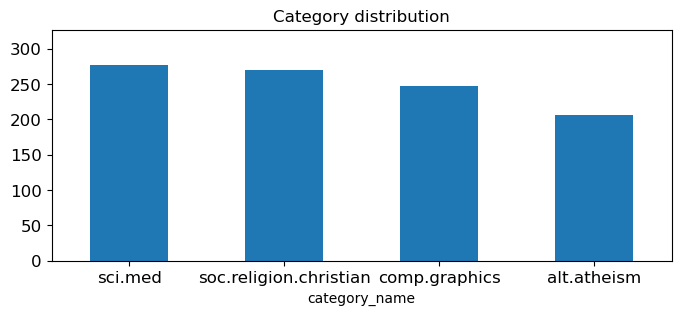

In [17]:
# Answer here

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50)  # 277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(
    kind="bar",
    title="Category distribution",
    ylim=[0, upper_bound],
    rot=0,
    fontsize=12,
    figsize=(8, 3),
)

#### Exercise 8 (take home)

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

由於範例圖片有按照各 category 大小降序排序，因此我們還會需要使用上`.sort_values(ascending=False)`


<Axes: title={'center': 'Category distribution'}>

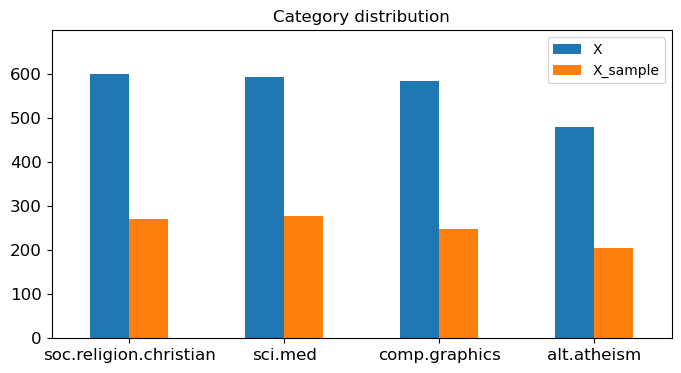

In [18]:
# Answer here
upper_bound = max(X.category_name.value_counts() + 100)

# merge X and X_sample and create a new dataset for plotting
plotdata = pd.DataFrame(
    {
        "X": X.category_name.value_counts(),
        "X_sample": X_sample.category_name.value_counts(),
    },
    index=categories,
).sort_values(
    ["X"], ascending=False
)  # sorted by the counts of X dataset

plotdata.plot(
    kind="bar",
    title="Category distribution",
    ylim=[0, upper_bound],
    rot=0,
    fontsize=12,
    figsize=(8, 4),
)

#### Unigram and document-term matrix creation


In [19]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/wangpeiyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# takes a like a minute or two to process
X["unigrams"] = X["text"].apply(lambda x: dmh.tokenize_text(x))
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [21]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(
    X.text
)  # learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


#### Exercise 9

In [22]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])
# analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

#### Exercise 10 (take home)


In [23]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [24]:
# Answer here

indices = X_counts[4].toarray().flatten()

# Find another 1 in fifth record
print("Another value of 1 in the fifth record [0:100]: ", np.where(indices == 1)[0][1])


# get the specific word of index 37 from CountVectorizer
print(
    "Feature name (index->vocabulary):",
    np.where(indices == 1)[0][1],
    "->",
    count_vect.get_feature_names_out()[np.where(indices == 1)[0][1]],
)

Another value of 1 in the fifth record [0:100]:  37
Feature name (index->vocabulary): 37 -> 01


#### Plot a heat map of term-document matrix


,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


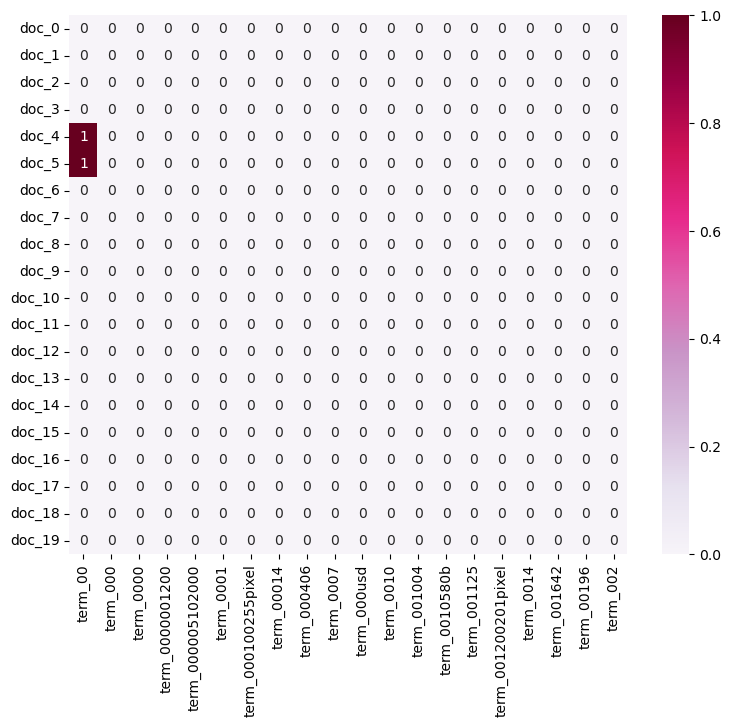

In [25]:
# first twenty features only
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray()  # X_counts[how many documents, how many terms]


df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

#### Exercise 11 (take home)

1. 先統計出每個詞彙出現的頻率，並選擇最常出現的前 50 個 term
2. 繪製前 20 個 document 和前 50 個 term 的 heat map

在這裡我們仍然想嘗試可否觀察到更多的 document，然而繪製出的結果並不是太好...
因此我們提出了新的改進方法：

1. 改用`plotly`進行繪圖
2. 改取 top 30 常出現的單字
3. 盡可能呈現所有 document，選擇含有 15 個以上 top 30 常見字的 document！


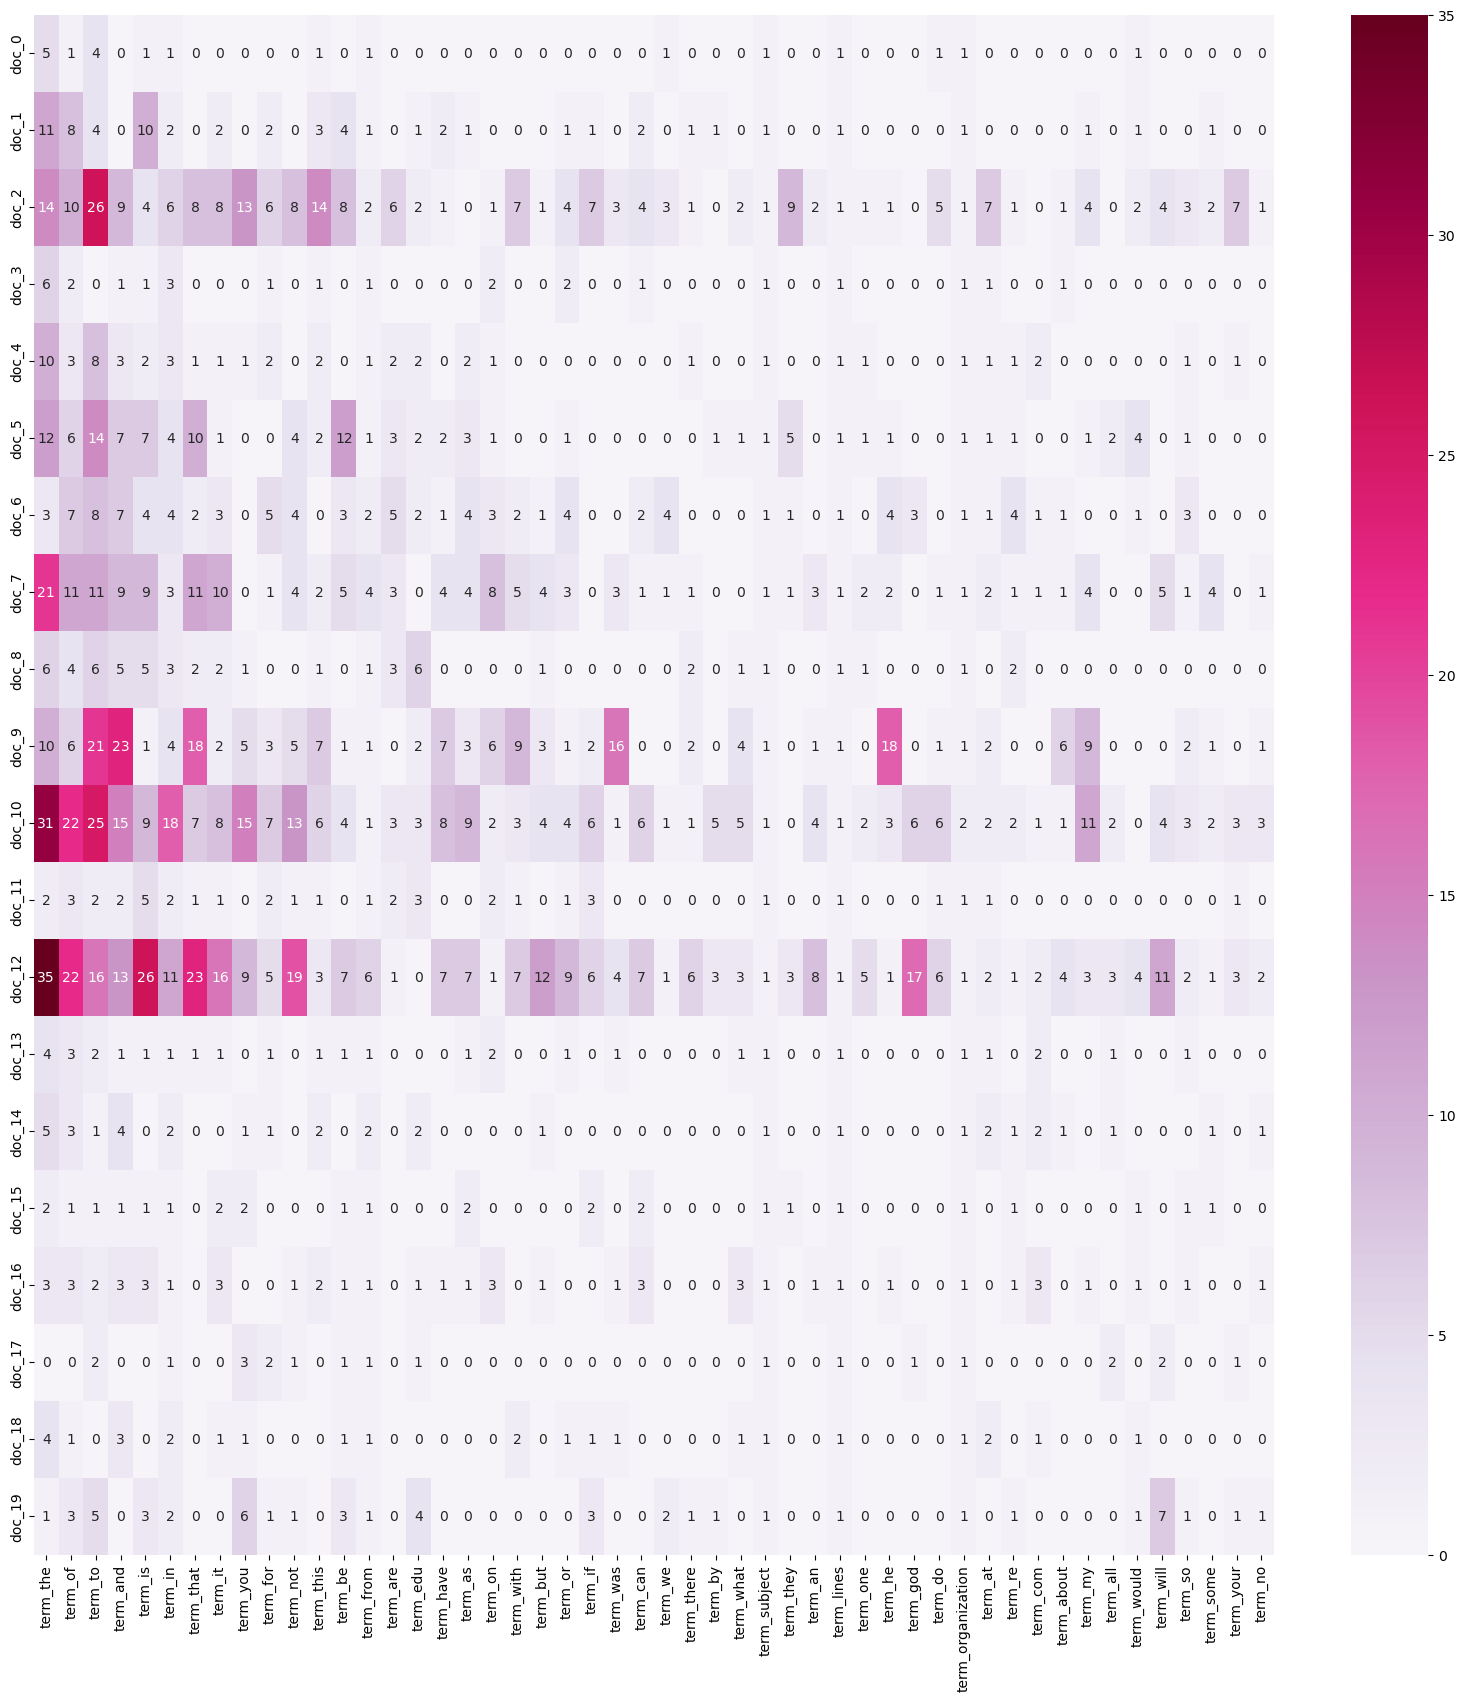

In [26]:
# Answer here

word_freq = X_counts.toarray().sum(axis=0)

# Get the top 50 indices that would sort the sums in descending order
top_50_indices = np.argsort(word_freq)[::-1][:50]

# get the frequency of those indices
top_50_word_freq = word_freq[top_50_indices]

plot_x_top50 = [
    "term_" + str(i) for i in count_vect.get_feature_names_out()[top_50_indices]
]

plot_z_50voc = X_counts[:20, top_50_indices].toarray()

df_todraw = pd.DataFrame(plot_z_50voc, columns=plot_x_top50, index=plot_y)
# display(df_todraw)

plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw, cmap="PuRd", annot=True)

In [27]:
# Another answer
word_freq = X_counts.toarray().sum(axis=0)

# Get the top 30 indices that would sort the sums in descending order
top_30_indices = np.argsort(word_freq)[::-1][:30]

# get the frequency of those indices
top_30_word_freq = word_freq[top_50_indices]

plot_x_top30 = [
    "term_" + str(i) for i in count_vect.get_feature_names_out()[top_30_indices]
]
plot_z_30voc = X_counts[:, top_30_indices].toarray()


# thresholds for filtering rows
row_threshold = 10

# screen the rows by thresholds we set
filtered_rows = [i for i, row in enumerate(plot_z_30voc) if sum(row) > row_threshold]

# keep the filtered rows
filtered_data = plot_z_30voc[filtered_rows]
filtered_y = ["doc_" + str(i) for i in filtered_rows]

# plot
trace = go.Heatmap(z=filtered_data, x=plot_x_top30, y=filtered_y, colorscale="Turbo")

layout = go.Layout(
    xaxis=dict(title="Terms"), yaxis=dict(title="Documents"), width=1200, height=800
)


fig = go.Figure(data=[trace], layout=layout)
fig.update_xaxes(tickangle=90)

fig.show()

#### Dimensionality Reduction (PCA)


In [28]:
print(X_counts.shape)
X_reduced = PCA(n_components=2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 2)


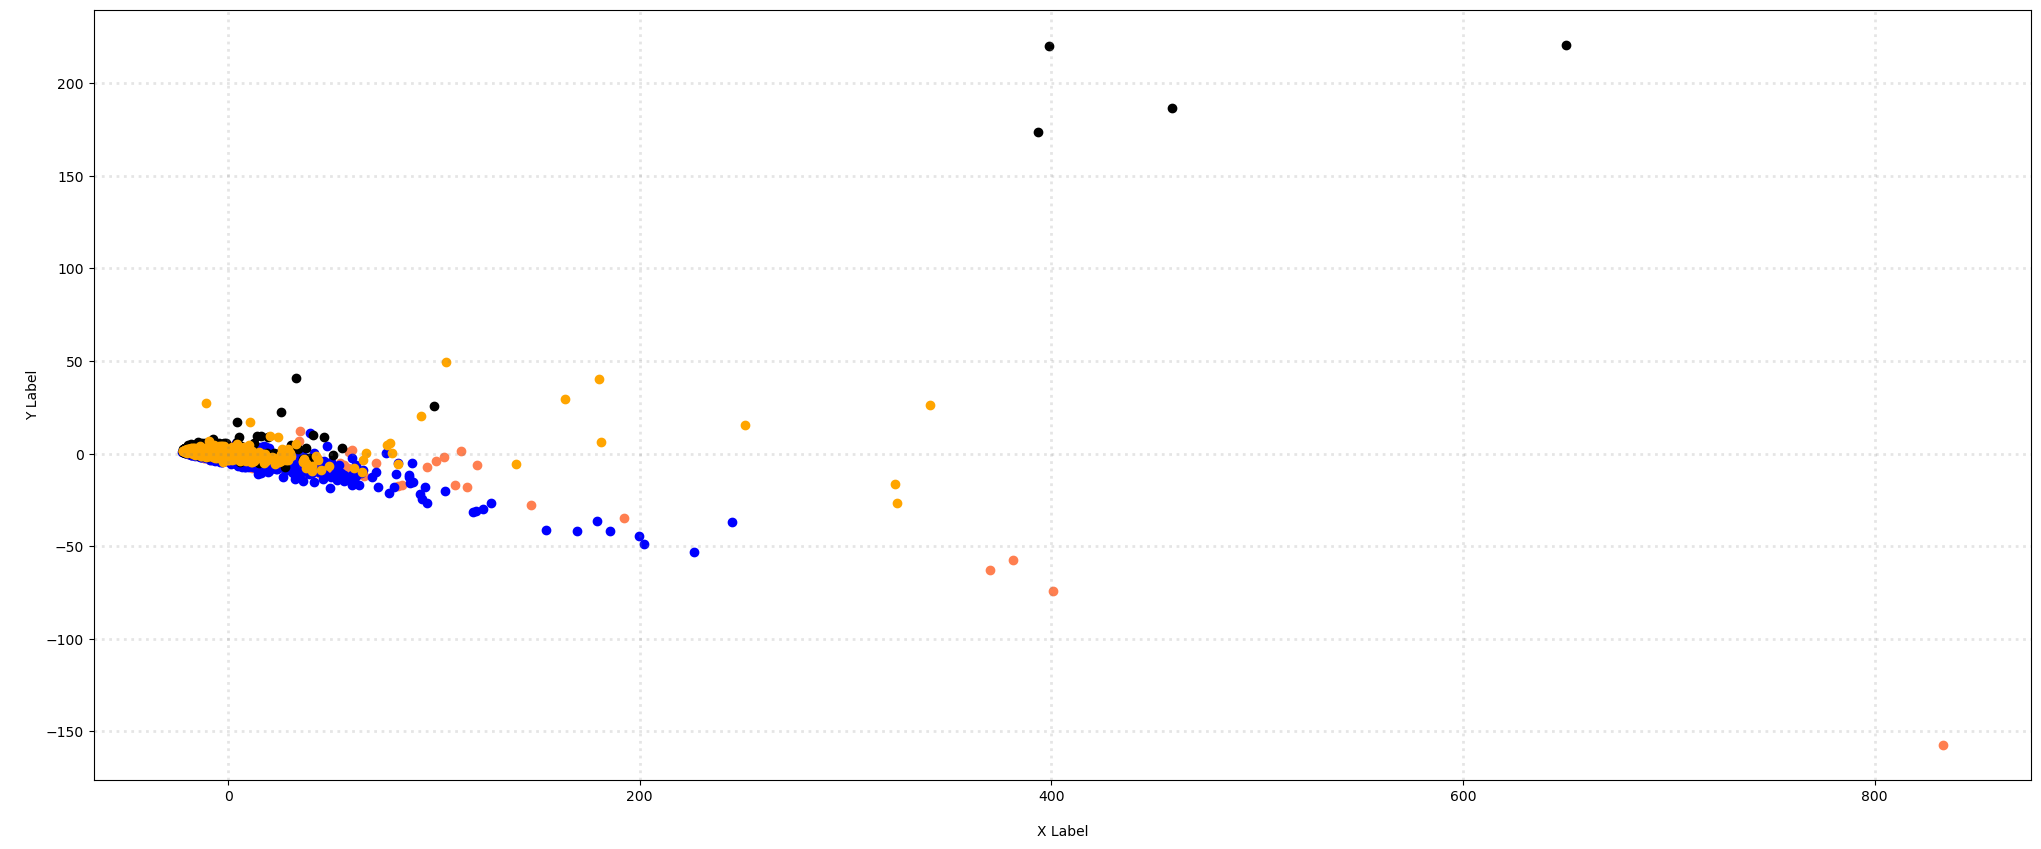

In [29]:
col = ["coral", "blue", "black", "orange"]

# plot
fig = plt.figure(figsize=(25, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X["category_name"] == category].T[0]
    ys = X_reduced[X["category_name"] == category].T[1]

    ax.scatter(xs, ys, c=c, marker="o")

ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
ax.set_xlabel("\nX Label")
ax.set_ylabel("\nY Label")

plt.show()

#### Exercise 12 (take home)

(2257, 3)


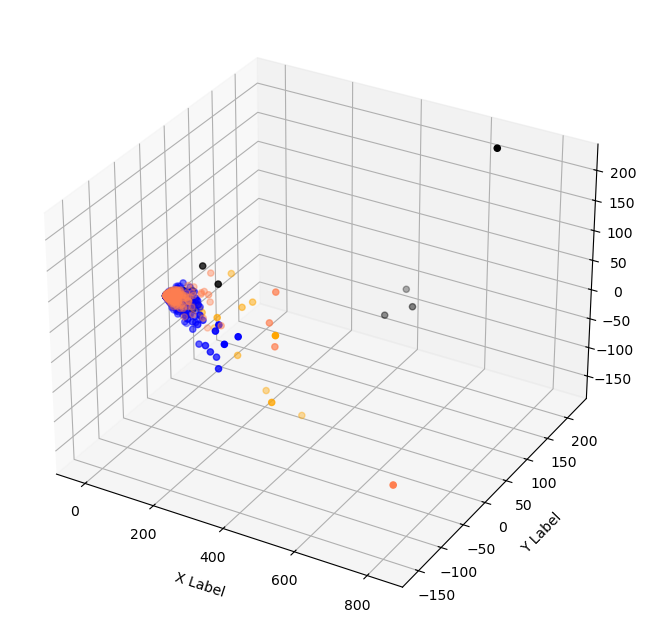

In [30]:
# Answer here

# set the point color as example above
col = ["coral", "blue", "black", "orange"]

# reduce the dimensionality to 3
X_reduced_3 = PCA(n_components=3).fit_transform(X_counts.toarray())
print(X_reduced_3.shape)


# plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

for c, category in zip(col, categories):
    xs = X_reduced_3[X["category_name"] == category].T[0]
    ys = X_reduced_3[X["category_name"] == category].T[1]
    zs = X_reduced_3[X["category_name"] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker="o", label=category)

ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
ax.set_xlabel("\nX Label")
ax.set_ylabel("\nY Label")
ax.set_zlabel("\nZ Label")


plt.show()

#### Attribute Transformation (frequency calculation)


35788


/var/folders/ft/gp5wnq_j2639f3ch0zm7pbvm0000gn/T/ipykernel_78334/271190988.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

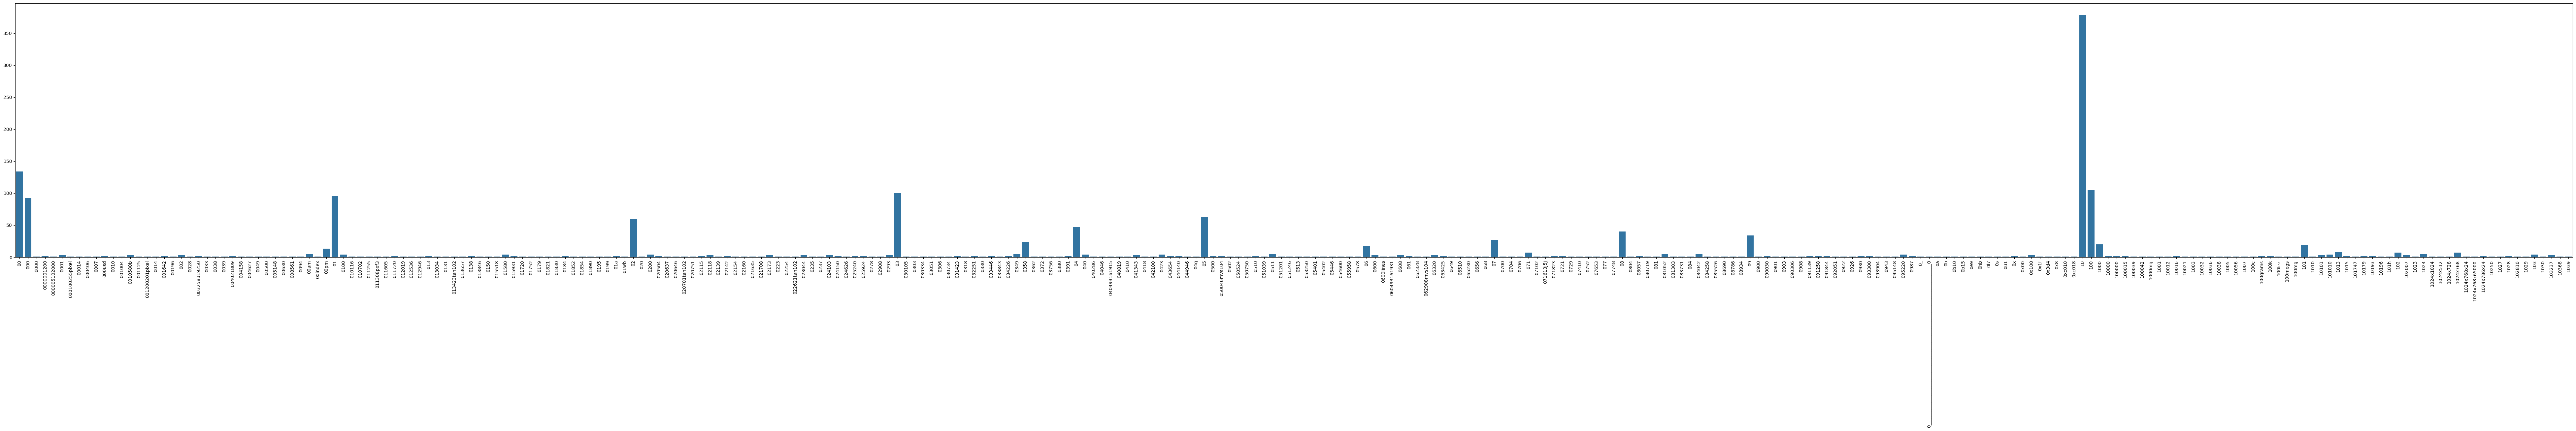

In [31]:
# calculate the term frequencies
term_frequencies = []
print(X_counts.shape[1])
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

# calculate the term frequencies and represented as a one-dimensional np.array
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

#### Exercise 13 (take home)


In [32]:
# Answer here

# form a new data set for plotly
df = {
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300],
}

fig = px.bar(df, x="term", y="frequency")
fig.update_xaxes(tickangle=90, tickfont=dict(size=5))
fig.update_layout(xaxis_title="Term", yaxis_title="Frequency")
fig.show()

#### Exercise 14 (take home)
使用`df.nlargest()`找出前 100 個高頻詞匯呈現


In [33]:
# Answer here

# buid a dataframe include terms and its frequencies
df_all = pd.DataFrame(
    {"term": count_vect.get_feature_names_out(), "frequency": term_frequencies}
)

# find top 100 high-frequency words
selected_terms = df_all.nlargest(200, "frequency")

# plot
fig = px.bar(selected_terms, x="term", y="frequency")
fig.update_xaxes(tickangle=90, tickfont=dict(size=5))
fig.update_layout(xaxis_title="Term", yaxis_title="Frequency")
fig.show()

#### Exercise 15 (take home)

In [34]:
# Answer here

# turn df created before into dataframe then sort it by frequency
df = pd.DataFrame(df)
df_sorted = df.sort_values(by="frequency", ascending=False)


fig = px.bar(df_sorted, x="term", y="frequency")
fig.update_xaxes(tickangle=90, tickfont=dict(size=5))
fig.update_layout(xaxis_title="Term", yaxis_title="Frequency")
fig.show()

#### Binarization


In [35]:
mlb = preprocessing.LabelBinarizer()

In [36]:
mlb.fit(X.category)

LabelBinarizer()

In [37]:
X["bin_category"] = mlb.transform(X["category"]).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


#### Exercise 16 (take home)
這裡使用`mlb.fit(X.category_name)`成功～

但是前面一個範例`mlb.fit(X.category)` 在本地端 run 時出現報錯，最後用`X['category'] = X['category'].astype('int')`的方法強制轉型才成功。

In [38]:
# Answer here
mlb.fit(X.category_name)
X["bin_category_name"] = mlb.transform(X["category_name"]).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]","[0, 0, 1, 0]"


### Task 2


#### Load data


In [39]:
# read all txt files

lines = []
file_names = ["yelp_labelled.txt", "amazon_cells_labelled.txt", "imdb_labelled.txt"]
file_directory = "../../sentiment labelled sentences/"

for file in file_names:
    with open(file_directory + file, "r") as text_file:
        lines += text_file.read().split("\n")

In [40]:
print(type(lines))
lines[:5]

<class 'list'>


['Wow... Loved this place.\t1',
 'Crust is not good.\t0',
 'Not tasty and the texture was just nasty.\t0',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1',
 'The selection on the menu was great and so were the prices.\t1']

In [41]:
# split by "\t" -> [text, score]
lines = [line.split("\t") for line in lines]
lines[:5]

[['Wow... Loved this place.', '1'],
 ['Crust is not good.', '0'],
 ['Not tasty and the texture was just nasty.', '0'],
 ['Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
  '1'],
 ['The selection on the menu was great and so were the prices.', '1']]

In [42]:
# transform to pandas dataframe
df = pd.DataFrame(lines, columns=["text", "sentiment"])
print(df.shape)
df.head()

(3003, 2)


,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [43]:
df.sentiment[0] #可以發現 sentiment 欄位的資料型態為`str`必要時必須進行轉換

'1'

#### Exercise 1


In [44]:
for t in df.text[:3]:
    print(t)

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.


#### Exercise 2 (take home)
這裡我們嘗試使用`.query()`以及 boolean indexing 進行:

1. 使用`.loc`,`.iloc`進行取值
2. 以`X[category]`value 來篩選出 subset
3. 更改特定 records 的`X[category]`value
4. 以更改後的條件，再次將數據修改回來


In [45]:
# get value by loc
df.loc[:10, "text"]

0                              Wow... Loved this place.
1                                    Crust is not good.
2             Not tasty and the texture was just nasty.
3     Stopped by during the late May bank holiday of...
4     The selection on the menu was great and so wer...
5        Now I am getting angry and I want my damn pho.
6                 Honeslty it didn't taste THAT fresh.)
7     The potatoes were like rubber and you could te...
8                             The fries were great too.
9                                        A great touch.
10                             Service was very prompt.
Name: text, dtype: object

In [46]:
# get value by iloc
df.iloc[:10, 0]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: text, dtype: object

In [47]:
# Copy the dataframe to do further modify
df_copied = df.copy()
print(df_copied.shape)

# filter df to get all the positive comment
df_positive = df_copied[df_copied["sentiment"] == "1"]
print(df_positive.shape)


df_copied.query('sentiment == "1"', inplace=True)
print(df_copied.shape)

df_copied.head()

(3003, 2)
(1500, 2)
(1500, 2)


,text,sentiment
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


In [48]:
# change sentiment value of the previous 10 records to '10'
df_copied.reset_index(drop=True, inplace=True)  # reset the index to 0,1,2, ....
df_copied.loc[:6, "sentiment"] = "10"
print(df_copied[:8])

# data recovery
df_copied.loc[df_copied["sentiment"] == "10", "sentiment"] = 1
print(df_copied[:8])

                                                text sentiment
0                           Wow... Loved this place.        10
1  Stopped by during the late May bank holiday of...        10
2  The selection on the menu was great and so wer...        10
3                          The fries were great too.        10
4                                     A great touch.        10
5                           Service was very prompt.        10
6  I tried the Cape Cod ravoli, chicken,with cran...        10
7                                Highly recommended.         1
                                                text sentiment
0                           Wow... Loved this place.         1
1  Stopped by during the late May bank holiday of...         1
2  The selection on the menu was great and so wer...         1
3                          The fries were great too.         1
4                                     A great touch.         1
5                           Service was very prompt.   

#### Exercise 3

In [49]:
df[df["sentiment"] == "1"][::10][:5]

,text,sentiment
0,Wow... Loved this place.,1
23,I could care less... The interior is just beau...,1
40,The shrimp tender and moist.,1
55,"Loved it...friendly servers, great food, wonde...",1
70,"The deal included 5 tastings and 2 drinks, and...",1


#### check missing values
發現資料集中存在 null data 可能會需要進行後續處理！


In [50]:
# check missing values (by column)
print(df.isnull())
df.isnull().apply(lambda x: dmh.check_missing_values(x))

       text  sentiment
0     False      False
1     False      False
2     False      False
3     False      False
4     False      False
...     ...        ...
2998  False      False
2999  False      False
3000  False      False
3001  False      False
3002  False       True

[3003 rows x 2 columns]


,text,sentiment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,3


#### Exercise 4


In [51]:
# Answer here
# using function in data_mining_helpers.py
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
3000    (The amoung of missing records is: , 0)
3001    (The amoung of missing records is: , 0)
3002    (The amoung of missing records is: , 1)
Length: 3003, dtype: object

#### Exercise 5 (take home)

由於 Ex5 的題目是在判斷 missing value 的型態（Task1 已經完成），我們改在 EX5 探討如何運用其他 function 找出並且修正新資料集的 missing value！


In [52]:
# Answer here
# using pandas function
na_index = df.isna().any(axis=1)
print("records with missing value:", na_index[na_index].index)
print([df.iloc[i][1] for i in na_index[na_index].index])

records with missing value: Index([1000, 2001, 3002], dtype='int64')
[None, None, None]


得知 missing value 的 index 為`[1000, 2001, 3002]` 並且型態為`None`。


In [53]:
# another method using pandas querying
df[(df["sentiment"] != "1") & (df["sentiment"] != "0")]

,text,sentiment
1000,,None
2001,,None
3002,,None


此方法直接找除了 '0' or '1' 之外的非法數值有哪些，在不清楚 missing value 型態時可能更方便！


In [54]:
# remove corrupted data
df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


#### data sampling


In [55]:
print(df.shape)
df_sample = df.sample(n=1000, random_state=42)  # random state
display(df_sample)

(3000, 2)


,text,sentiment
1802,For the price this was a great deal.,1
1191,The replacement died in a few weeks.,0
1818,Gets a signal when other Verizon phones won't.,1
251,There is nothing privileged about working/eati...,0
2507,About ten minutes into this film I started hav...,0
...,...,...
618,They really want to make your experience a goo...,1
406,I'll definitely be in soon again.,1
1158,This item is fantastic and works perfectly!,1
1069,Great for iPODs too.,1


#### Exercise 6 (take home)
`df` 與其取樣`df_sample`有很多不同之處，以下我們以三個面向展現：

1. df_sample 為隨機取樣，因此 idex 並不具有順序關係
2. df_sample 的數據集大小 < df 的數據集大小
3. df_sample 的`sentiment`分佈大致與 df 一致 （另外使用 `plotly` 繪圖呈現）


In [56]:
# Answer here

print("-----top5 records of dataframe-----")
print(df.head())
print(df_sample.head())

print("\n-----size of dataframe-----")
print("df:", df.shape, ", df_sample:", df_sample.shape)


print("\n-----distribution of data-----")
df_count = df.value_counts("sentiment")
print("df:", df_count)

df_sample_count = df_sample.value_counts("sentiment")
print("\ndf_sample:", df_sample_count)


sentimental_labels = ["negative", "positive"]

fig = go.Figure(
    data=[
        go.Bar(name="df", x=sentimental_labels, y=df.value_counts("sentiment")),
        go.Bar(
            name="df_sample",
            x=sentimental_labels,
            y=df_sample.value_counts("sentiment"),
        ),
    ]
)

# Change the bar mode
fig.update_layout(barmode="group")
fig.show()

-----top5 records of dataframe-----
                                                text sentiment
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
                                                   text sentiment
1802               For the price this was a great deal.         1
1191               The replacement died in a few weeks.         0
1818     Gets a signal when other Verizon phones won't.         1
251   There is nothing privileged about working/eati...         0
2507  About ten minutes into this film I started hav...         0

-----size of dataframe-----
df: (3000, 2) , df_sample: (1000, 2)

-----distribution of data-----
df: sentiment
0    1500
1    1500
Name: count, dtype: int64

df_sample: sentiment
0    527
1

sentiment
1    1500
0    1500
Name: count, dtype: int64


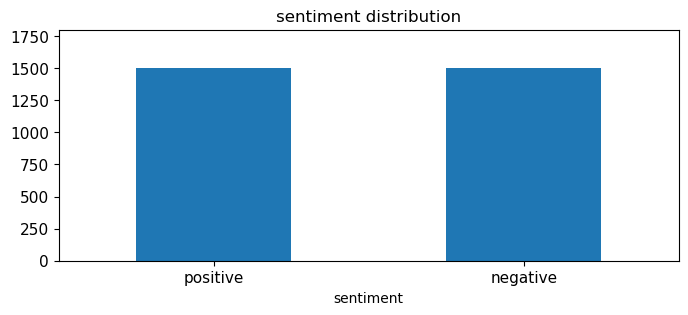

In [57]:
print(df.sentiment.value_counts())

# plot barchart for df
ax = df.sentiment.value_counts().plot(
    kind="bar",
    title="sentiment distribution",
    ylim=[0, 1800],
    rot=0,
    fontsize=11,
    figsize=(8, 3),
)


ax.set_xticklabels(["positive", "negative"])

plt.show()

sentiment
0    527
1    473
Name: count, dtype: int64


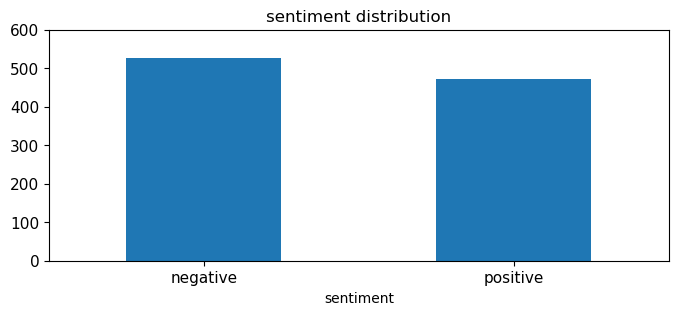

In [58]:
print(df_sample.sentiment.value_counts())

# plot barchart for df
ax = df_sample.sentiment.value_counts().plot(
    kind="bar",
    title="sentiment distribution",
    ylim=[0, 600],
    rot=0,
    fontsize=11,
    figsize=(8, 3),
)


ax.set_xticklabels(["negative", "positive"])

plt.show()

#### Exercise 7

527
sentiment_label
negative    527
positive    473
Name: count, dtype: int64


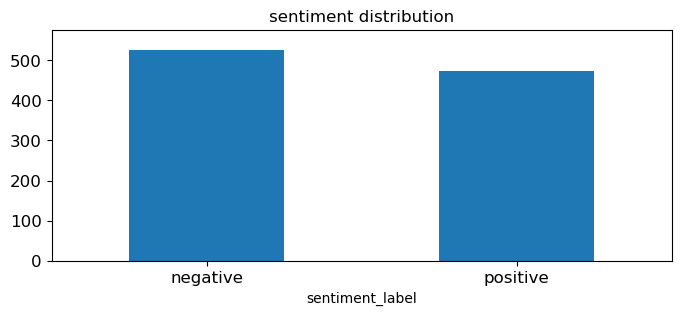

In [59]:
# Answer here

# make xticklabels more flexible -> add a new column named sentiment_label
df_sample["sentiment_label"] = df_sample["sentiment"].map(
    {"0": "negative", "1": "positive"}
)

# plot barchart for X_sample
print(max(df_sample.sentiment_label.value_counts()))
upper_bound = max(df_sample.sentiment_label.value_counts() + 50)
print(df_sample.sentiment_label.value_counts())

df_sample.sentiment_label.value_counts().plot(
    kind="bar",
    title="sentiment distribution",
    ylim=[0, upper_bound],
    rot=0,
    fontsize=12,
    figsize=(8, 3),
)

plt.show()

#### Exercise 8 (take home)

<Axes: title={'center': 'sentiment distribution'}>

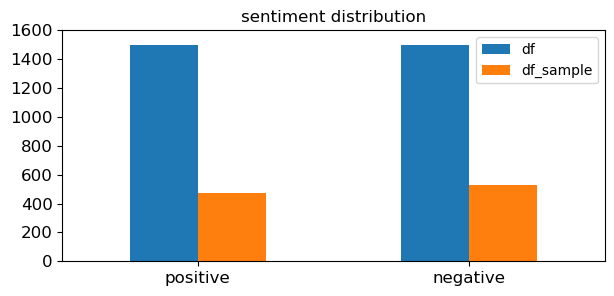

In [60]:
# Answer here

# make upper_bound and xticklabels more flexible
# add a new column sentiment_label based on the value of df["sentiment"]
df["sentiment_label"] = df["sentiment"].map({"0": "negative", "1": "positive"})
upper_bound = max(df.sentiment_label.value_counts() + 100)

plotdata = pd.DataFrame(
    {
        "df": df.sentiment_label.value_counts(),
        "df_sample": df_sample.sentiment_label.value_counts(),
    },
    index=df.sentiment_label.unique(),
)

plotdata.plot(
    kind="bar",
    title="sentiment distribution",
    ylim=[0, upper_bound],
    rot=0,
    fontsize=12,
    figsize=(7, 3),
)

#### Unigram and document-term matrix creation


In [61]:
# takes a like a minute or two to process
df["unigrams"] = df["text"].apply(lambda x: dmh.tokenize_text(x))

In [62]:
df[0:4]

,text,sentiment,sentiment_label,unigrams
0,Wow... Loved this place.,1,positive,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,negative,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,negative,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,positive,"[Stopped, by, during, the, late, May, bank, ho..."


In [63]:
list(df[0:1]["unigrams"])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

In [64]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(
    df.text
)  # learn the vocabulary and return document-term matrix
print(df_counts.shape)
print(df_counts[0])

(3000, 5155)
  (0, 5112)	1
  (0, 2711)	1
  (0, 4558)	1
  (0, 3351)	1


In [65]:
count_vect.get_feature_names_out()[5112]

'wow'

#### Exercise 9


In [66]:
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['wow', 'loved', 'this', 'place']

In [67]:
print(df_counts.shape)
count_vect.get_feature_names_out()[0:10]

(3000, 5155)


array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

#### Exercise 10 (take home)
由於 Task 1 所選擇的範圍`X_counts[0:5, 0:100]`不一定適用於`df_counts`。這裡我們以找到`df_counts[4]`所有非 0 數值為目標！


In [68]:
# Answer here

indices = df_counts[4].toarray().flatten()

# find all index value of 1 in the fifth record
print("index value of 1 in the fifth record are: ", np.where(indices == 1)[0])

# zip the term and its index together then print them in loop
for i, (index, word) in enumerate(
    zip(
        np.where(indices == 1)[0],
        count_vect.get_feature_names_out()[np.where(indices == 1)[0]],
    )
):
    print(f"Feature {i} index->vocabulary: {index} -> {word}")

index value of 1 in the fifth record are:  [ 216 2023 2850 3122 3472 3961 4161 4968 5015]
Feature 0 index->vocabulary: 216 -> and
Feature 1 index->vocabulary: 2023 -> great
Feature 2 index->vocabulary: 2850 -> menu
Feature 3 index->vocabulary: 3122 -> on
Feature 4 index->vocabulary: 3472 -> prices
Feature 5 index->vocabulary: 3961 -> selection
Feature 6 index->vocabulary: 4161 -> so
Feature 7 index->vocabulary: 4968 -> was
Feature 8 index->vocabulary: 5015 -> were


#### Exercise 11 (take home)

比起 Task 1 使用的`fetch_20newsgroups` dataset, Task 2 的 text 多為短句，因此在詞頻統計上，比前者小了很多！

同 Task 1 一樣改用`plotly`進行繪圖，但由於資料集不同進行以下調整：

1. 改取 top 50 常出現的單字
2. 選擇含有至少 1 個以上 top 50 常見字的 document！


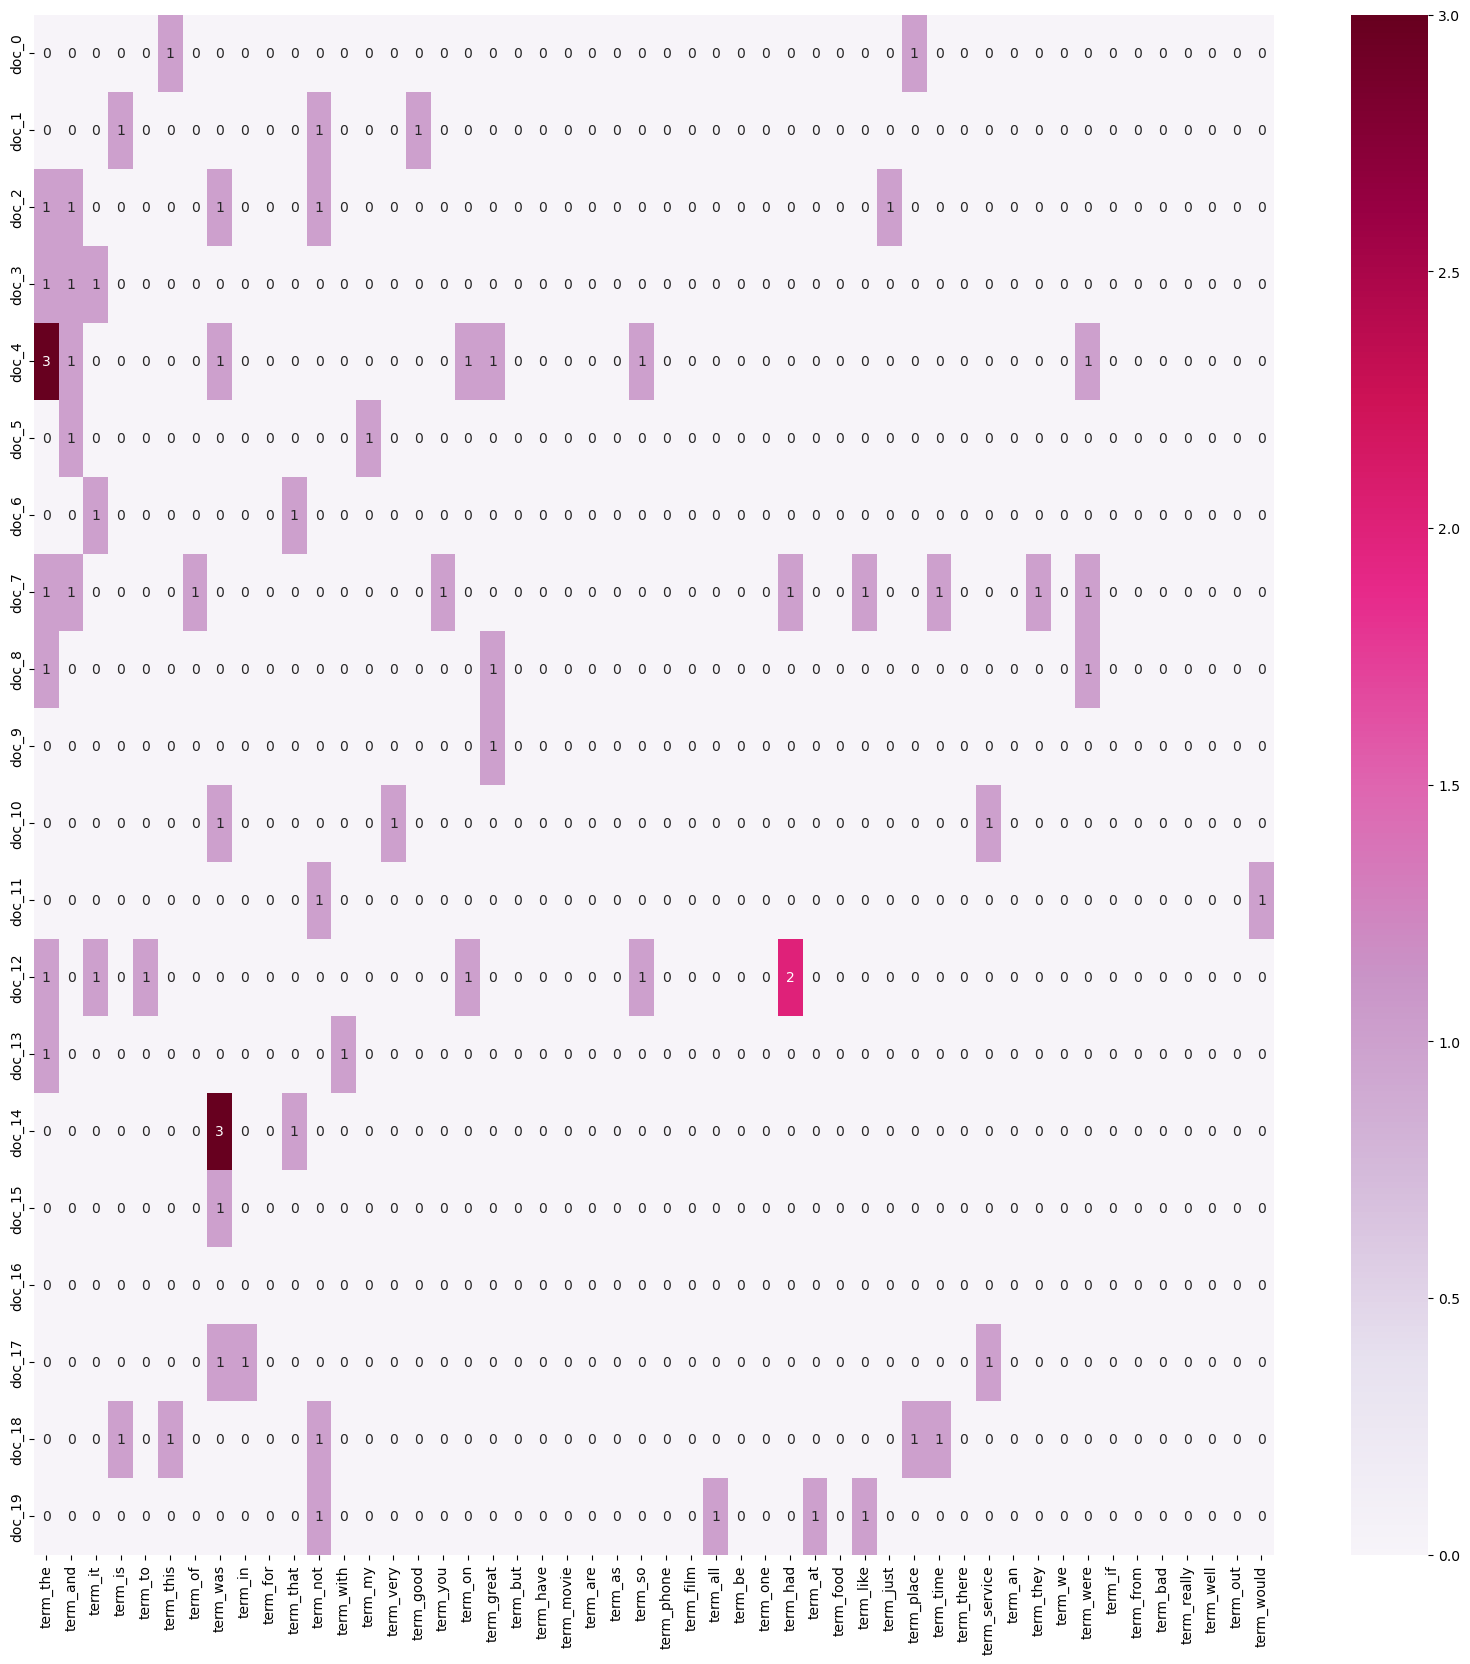

In [69]:
# Answer here

word_freq = df_counts.toarray().sum(axis=0)

# Get the top 50 indices that would sort the sums in descending order
top_50_indices = np.argsort(word_freq)[::-1][:50]

# get the frequency of those indices
top_50_word_freq = word_freq[top_50_indices]

plot_x_top50 = [
    "term_" + str(i) for i in count_vect.get_feature_names_out()[top_50_indices]
]

plot_z_50voc = df_counts[:20, top_50_indices].toarray()

df_todraw = pd.DataFrame(plot_z_50voc, columns=plot_x_top50, index=plot_y)
# display(df_todraw)

plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw, cmap="PuRd", annot=True)

In [70]:
# Another answer
word_freq = df_counts.toarray().sum(axis=0)

# Get the top 50 indices that would sort the sums in descending order
top_50_indices = np.argsort(word_freq)[::-1][:50]

# get the frequency of those indices
top_50_word_freq = word_freq[top_50_indices]


plot_x_top50 = [
    "term_" + str(i) for i in count_vect.get_feature_names_out()[top_50_indices]
]

plot_z_50voc = df_counts[:, top_50_indices].toarray()


# thresholds for filtering rows
row_threshold = 0.5

# screen the rows by thresholds we set
filtered_rows = [i for i, row in enumerate(plot_z_50voc) if sum(row) > row_threshold]

# keep the filtered rows
filtered_data = plot_z_50voc[filtered_rows]
filtered_y = ["doc_" + str(i) for i in filtered_rows]

# plot
trace = go.Heatmap(z=filtered_data, x=plot_x_top50, y=filtered_y, colorscale="Turbo")

layout = go.Layout(
    xaxis=dict(title="Terms"), yaxis=dict(title="Documents"), width=1200, height=800
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

#### Dimensionality Reduction (PCA)


In [71]:
print(df_counts.shape)
df_reduced = PCA(n_components=2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(3000, 5155)
(3000, 2)


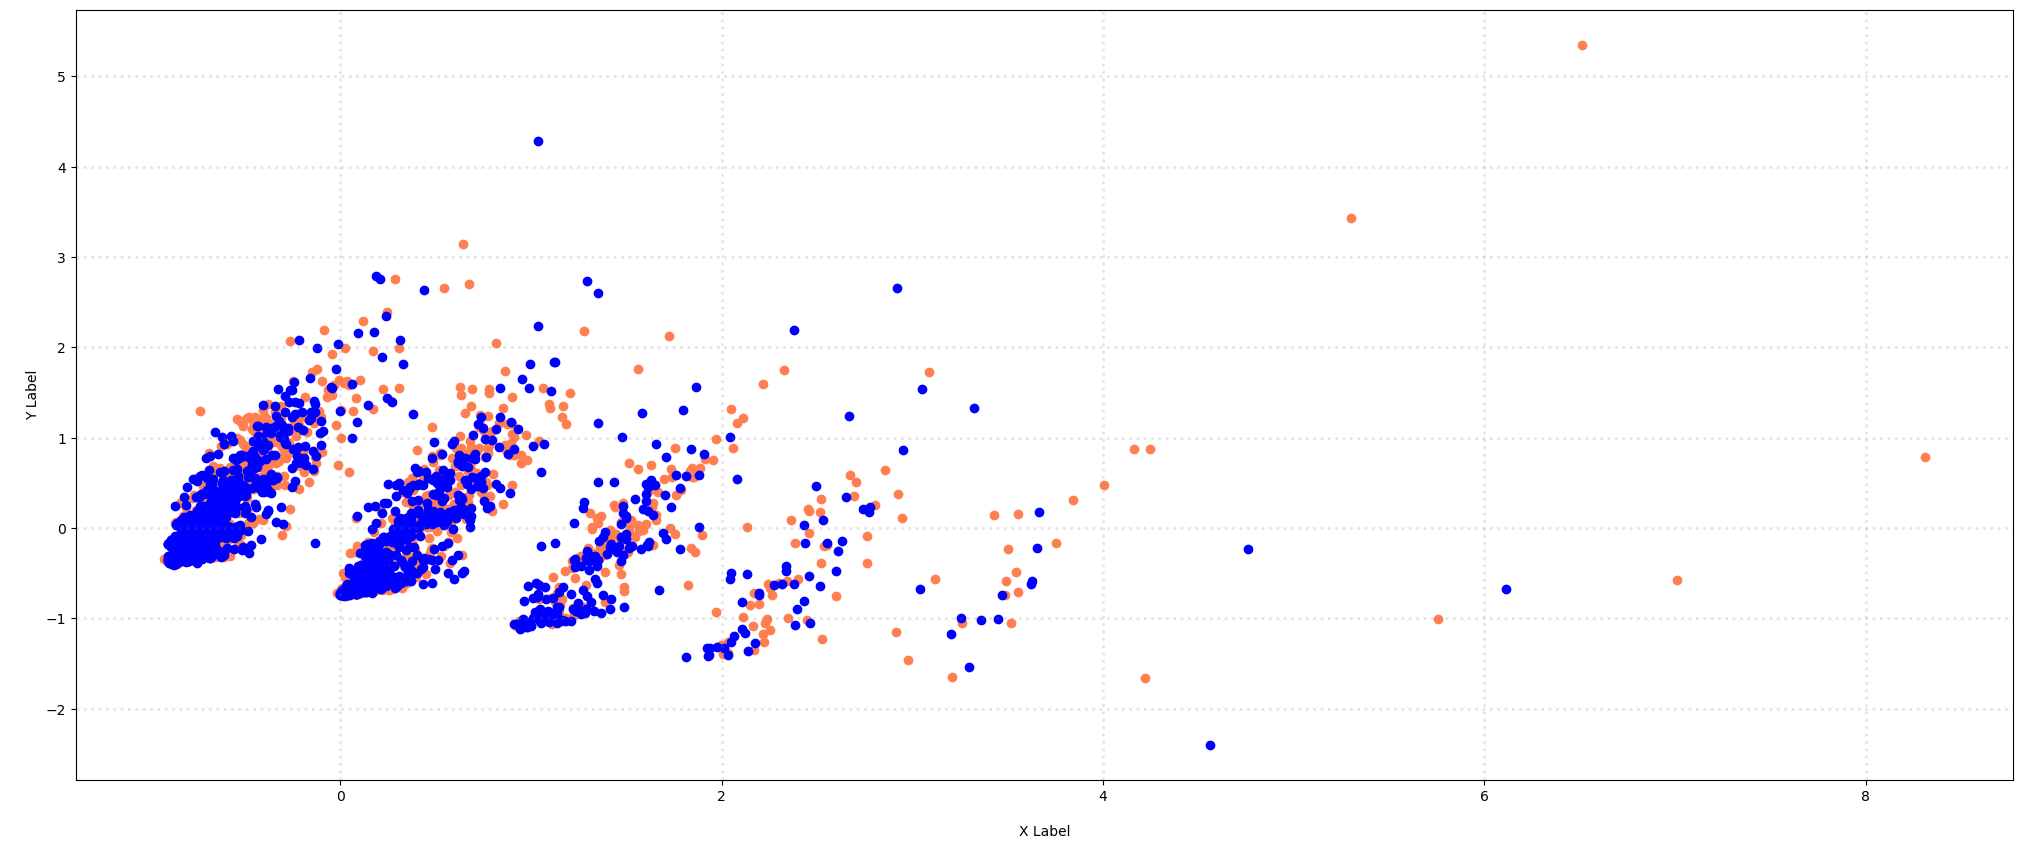

In [72]:
# set the point color the
col = ["coral", "blue"]
categories = ["positive", "negative"]

# plot
fig = plt.figure(figsize=(25, 10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df["sentiment_label"] == category].T[0]
    ys = df_reduced[df["sentiment_label"] == category].T[1]

    ax.scatter(xs, ys, c=c, marker="o")

ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
ax.set_xlabel("\nX Label")
ax.set_ylabel("\nY Label")

plt.show()

#### Exercise 12 (take home)

(3000, 3)


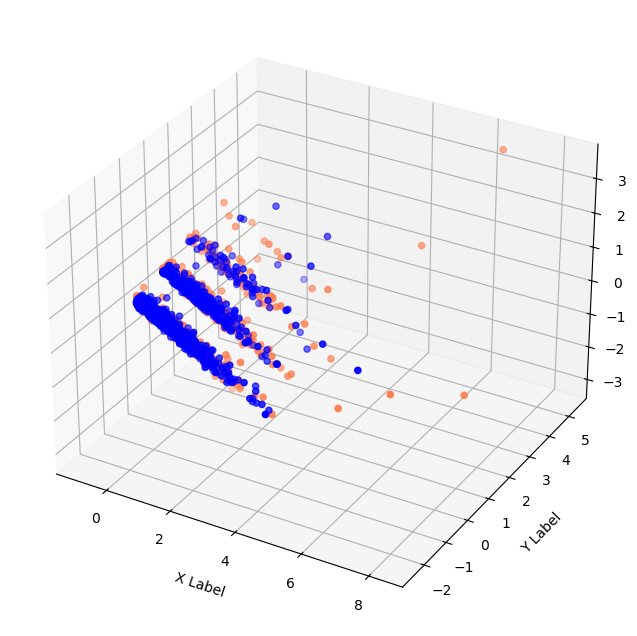

In [73]:
# Answer here

# reduce the dimensionality to 3
df_reduced_3 = PCA(n_components=3).fit_transform(df_counts.toarray())
print(df_reduced_3.shape)


# plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

for c, category in zip(col, categories):
    xs = df_reduced_3[df["sentiment_label"] == category].T[0]
    ys = df_reduced_3[df["sentiment_label"] == category].T[1]
    zs = df_reduced_3[df["sentiment_label"] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker="o", label=category)

ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
ax.set_xlabel("\nX Label")
ax.set_ylabel("\nY Label")
ax.set_zlabel("\nZ Label")

plt.show()

#### Attribute Transformation (frequency calculation)


5155


/var/folders/ft/gp5wnq_j2639f3ch0zm7pbvm0000gn/T/ipykernel_78334/1485275846.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


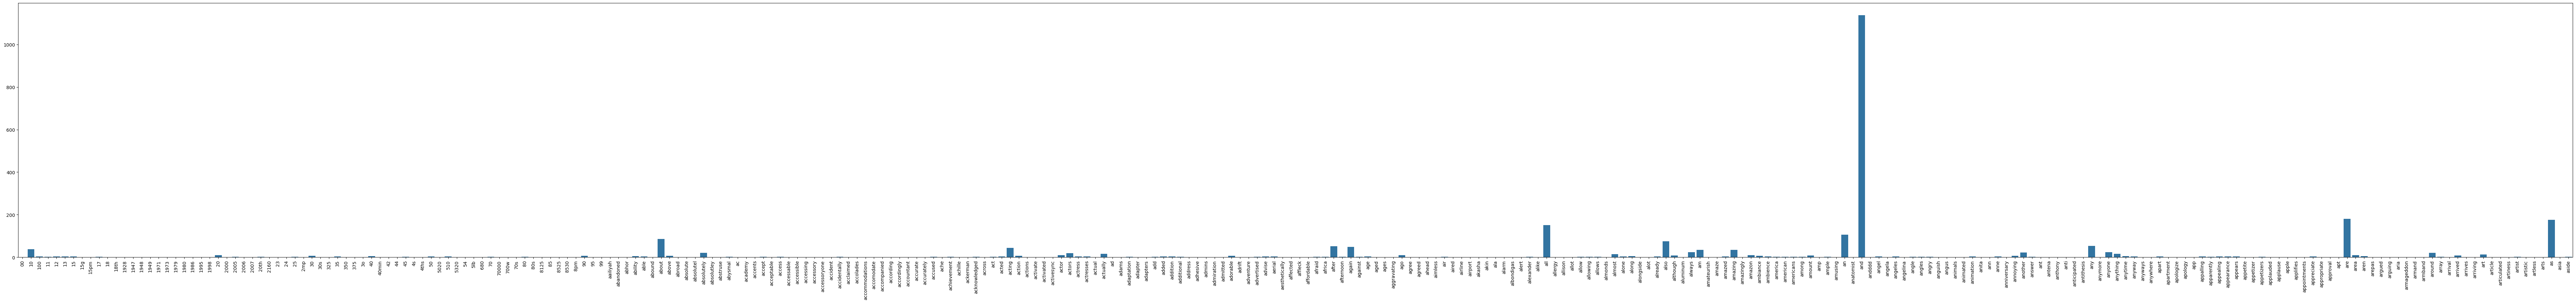

In [74]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(df_counts.shape[1])
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:, j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

#### Exercise 13 (take home)


In [75]:
# form a new data set for plotly
data = {
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300],
}

fig = px.bar(data, x="term", y="frequency")
fig.update_xaxes(tickangle=90, tickfont=dict(size=5))
fig.update_layout(xaxis_title="Term", yaxis_title="Frequency")
fig.show()

#### Exercise 14 (take home)


In [76]:
# Answer here

# buid a dataframe include terms and its frequencies
data_all = pd.DataFrame(
    {"term": count_vect.get_feature_names_out(), "frequency": term_frequencies}
)

# find top 100 high-frequency words
selected_terms = data_all.nlargest(100, "frequency")

# plot a bar chart
fig = px.bar(selected_terms, x="term", y="frequency")
fig.update_xaxes(tickangle=90, tickfont=dict(size=5))
fig.update_layout(xaxis_title="Term", yaxis_title="Frequency")
fig.show()

#### Exercise 15 (take home)


In [77]:
# Answer here

# sort the data（From Exercise）by its frequency
data = pd.DataFrame(data)
data_sorted = data.sort_values(by="frequency", ascending=False)


fig = px.bar(data_sorted, x="term", y="frequency")
fig.update_xaxes(tickangle=90, tickfont=dict(size=5))
fig.update_layout(xaxis_title="Term", yaxis_title="Frequency")
fig.show()

#### Exercise 16 (take home)

因為 `sentiment_label` 只有 positive/negative 兩種可能，因此只用 [0] or[1] 即可表示


In [78]:
mlb = preprocessing.LabelBinarizer()

In [79]:
# Answer here
mlb.fit(df.sentiment_label)
df["bin_sentiment_label"] = mlb.transform(df["sentiment_label"]).tolist()

In [80]:
df[0:9]

,text,sentiment,sentiment_label,unigrams,bin_sentiment_label
0,Wow... Loved this place.,1,positive,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,negative,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,negative,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,positive,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,positive,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,negative,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,negative,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,negative,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,positive,"[The, fries, were, great, too, .]",[1]


### Task 3


#### New Data Visualizations


##### histogram (text length distribution)
比較二種評價與其長度關係

從圖中我們可以發現兩種評價的分布不太相同：正面評價集中在較小的 text length 範圍內，表示正面評價通常較短！


In [81]:
# add a new column for text_length
df["text_length"] = df["unigrams"].apply(len)

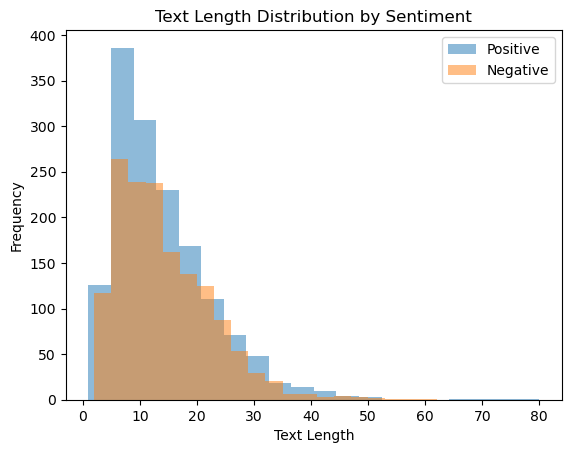

In [82]:
# get the text length from positive/negative comment
positive_lengths = df[df["sentiment_label"] == "positive"]["text_length"]
negative_lengths = df[df["sentiment_label"] == "negative"]["text_length"]

# plot
plt.hist(positive_lengths, bins=20, alpha=0.5, label="Positive")
plt.hist(negative_lengths, bins=20, alpha=0.5, label="Negative")


plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Text Length Distribution by Sentiment")
plt.legend()


plt.show()

##### Word cloud

使用 helpers 內建 function 繪圖

在 negative 的單字雲裡有 'good' 這個單字存在，但good其實是正面詞語！原因是很多負面評論常用 'not good' 這類文字呈現。

-> 由於文字雲無法傳達情感或上下文，這使得難以理解詞語是正面還是負面，以及它們在文本中的具體語境！


----- positive word cloud -----


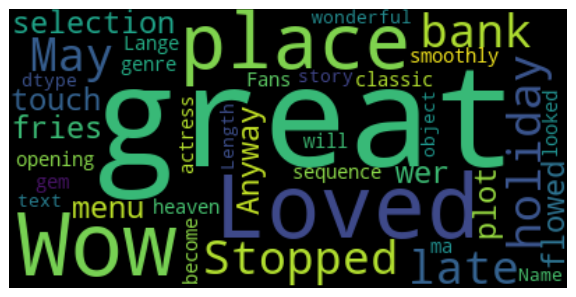

----- negative word cloud -----


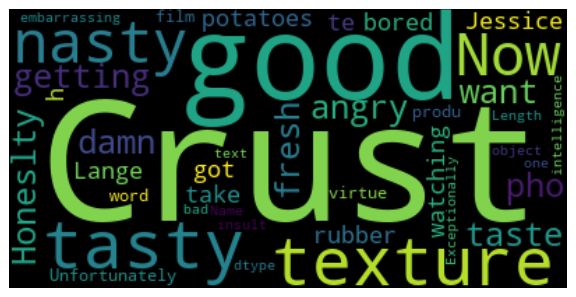

In [83]:
# positive word cloud
print("----- positive word cloud -----")
text_pos = df[df["sentiment_label"] == "positive"]["text"]
ta.plot_word_cloud(str(text_pos))


# negative word cloud
print("----- negative word cloud -----")
text_neg = df[df["sentiment_label"] == "negative"]["text"]
ta.plot_word_cloud(str(text_neg))

##### horizontal bar plot (N-gram)

為了避免上述上下文的問題，我們這裡透過使用 N-grams捕捉詞語之間的關係和上下文。

主要步驟如下：
1. 根據`df['text']`內的文字建立 n-gram 並移除 stop words
2. 計算 n-gram 在所有 documents 內出現的頻率並建立新的 dataframe{'word','count'}
3. 根據新建立的dataframe取前25名來繪圖


In [84]:
# Using stopwords from sklearn 

vectorizer = CountVectorizer(stop_words="english")
stop = vectorizer.get_stop_words()
print("Some stop words from sklearn: {}\n".format(list(stop)[:10]))

Some stop words from sklearn: ['latter', 'see', 'were', 'upon', 'part', 'four', 'wherever', 'neither', 'other', 'find']



In [85]:
# generate ngrams
def generate_ngrams(text, n_gram=1):
    # turn the text into lowercase words then removing all empty strings and stop words 
    tokens = [ token for token in text.lower().split(" ") if token != "" if token not in stop]

    # generates n-grams from a list of tokens
    ngrams = []
    for i in range(len(tokens) - n_gram + 1):
        ngram = " ".join(tokens[i:i + n_gram])
        ngrams.append(ngram)

    return ngrams

print("Unigrams:", generate_ngrams("I am craving for a hawaiian pizza right now"))
print("Bigrams:",generate_ngrams("I am craving for a hawaiian pizza right now",2))
print("Trigrams", generate_ngrams("I am craving for a hawaiian pizza right now",3))

Unigrams: ['craving', 'hawaiian', 'pizza', 'right']
Bigrams: ['craving hawaiian', 'hawaiian pizza', 'pizza right']
Trigrams ['craving hawaiian pizza', 'hawaiian pizza right']


In [86]:
# Get the  positive and negative reviews
review_pos = df[df["sentiment_label"] == "positive"]
review_neg = df[df["sentiment_label"] == "negative"]

In [87]:
# Calculate the frequency of ngram 
def calculate_ngram_frequencies(reviews, n_gram=1):
    freq_dict = {}
    for sent in reviews['text']:
        for word in generate_ngrams(sent,n_gram):
            if word in freq_dict:
                freq_dict[word] += 1
            else:
                freq_dict[word] = 1

    # sort the dict by its value (frequency) and turns it into pandas dataframe
    freq_df = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1],columns=["word", "count"])
    
    return freq_df

positive_frequencies = calculate_ngram_frequencies(review_pos,1)
positive_frequencies[:5]


,word,count
0,great,152
1,good,135
2,film,68
3,movie,64
4,it's,62


In [88]:
# plot horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["count"].values[::-1],
        showlegend=False,
        orientation="h",
        marker=dict(color=color)
    )
    return trace

# creating subplots
def create_word_count_subplots(trace0, trace1, flag):
    fig = sp.make_subplots(
        rows=2,
        cols=1,
        vertical_spacing=0.04,
        subplot_titles=["Frequent words of positive reviews", "Frequent words of negative reviews"]
    )
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 2, 1)
    fig["layout"].update(
        height=1200, width=900, paper_bgcolor="rgb(233,233,233)", title= str(flag)+"-gram Plots"
    )
    
    return fig

In [89]:
# Unigrams

positive_frequencies = calculate_ngram_frequencies(review_pos,1)
trace0 = horizontal_bar_chart(positive_frequencies.head(25), "green")

negative_frequencies = calculate_ngram_frequencies(review_neg,1)
trace1 = horizontal_bar_chart(negative_frequencies.head(25), "red")

word_count_fig = create_word_count_subplots(trace0, trace1,1)
word_count_fig.show()

In [90]:
# Bigrams
positive_frequencies = calculate_ngram_frequencies(review_pos,2)
trace0 = horizontal_bar_chart(positive_frequencies.head(25), "green")

negative_frequencies = calculate_ngram_frequencies(review_neg,2)
trace1 = horizontal_bar_chart(negative_frequencies.head(25), "red")

word_count_fig = create_word_count_subplots(trace0, trace1, 2)
word_count_fig.show()

In [91]:
# Trigrams
positive_frequencies = calculate_ngram_frequencies(review_pos,3)
trace0 = horizontal_bar_chart(positive_frequencies.head(25), "green")

negative_frequencies = calculate_ngram_frequencies(review_neg,3)
trace1 = horizontal_bar_chart(negative_frequencies.head(25), "red")

word_count_fig = create_word_count_subplots(trace0, trace1, 3)
word_count_fig.show()

比起單一單字，bigram 以及 trigram 更能呈現出評價的好壞。此外，從 n-gram 長條圖中我們可以發現隨著n上升，frquency也跟著下降！

#### TF-IDF features
在使用TF-IDF技術處理文字時，會需要先會需要先進行一些清理：

1. 移除stop words：使用前面用過的`stop = vectorizer.get_stop_words()`
2. 移除特殊符號，如!"#$%&'()：使用`string.punctuation`

此外，發現除去 stop words 時會連帶除去 'not'。然而 'not'可能是判斷 sentiment 的關鍵字！因此我們將不將其移除。

In [92]:
print("which we need to remove:",string.punctuation)

def clean_text(x):

    # remove punctuation marks
    string_punc = "".join([i for i in x.lower() if i not in string.punctuation])
    # remove stop words (exclude 'not')
    string_clean = " ".join([i for i in string_punc.split() if i.lower() not in stop or i.lower() == "not"])

    return string_clean

# generate a new column "text_clean" for further use
df["text_clean"] = df["text"].apply(clean_text)
df.head()

which we need to remove: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,text,sentiment,sentiment_label,unigrams,bin_sentiment_label,text_length,text_clean
0,Wow... Loved this place.,1,positive,"[Wow, ..., Loved, this, place, .]",[1],6,wow loved place
1,Crust is not good.,0,negative,"[Crust, is, not, good, .]",[0],5,crust not good
2,Not tasty and the texture was just nasty.,0,negative,"[Not, tasty, and, the, texture, was, just, nas...",[0],9,not tasty texture just nasty
3,Stopped by during the late May bank holiday of...,1,positive,"[Stopped, by, during, the, late, May, bank, ho...",[1],16,stopped late bank holiday rick steve recommend...
4,The selection on the menu was great and so wer...,1,positive,"[The, selection, on, the, menu, was, great, an...",[1],13,selection menu great prices


In [93]:
# transformed text data into TF-IDF feature
tfidf_vect = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df["text_clean"])
print(tfidf[0])

  (0, 5072)	1
  (0, 2684)	1
  (0, 3330)	1


In [94]:
tfidf_df = pd.DataFrame(tfidf.toarray())
print(tfidf_df.shape)
tfidf_df[:3]

(3000, 5118)


,0,1,2,3,4,5,6,7,8,9,...,5108,5109,5110,5111,5112,5113,5114,5115,5116,5117
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Naive Bayes classifier
1. 這裡分別討論兩種 feature：(1)Tf-Idf (2)word frequency；以及兩種 data：(1)df["text"] (2)df["text_clean"] 的結果
2. 使用 Grid Search 找出模型最佳參數組合
3. 使用 K-Fold Cross-Validation 評估模型泛化能力
4. 繪製混淆矩陣

---
1. 在 df["text_clean"]之下， Tf-Idf、Count皆有輕微 overfitting :
    * TF-IDF 在 kfold 下的的平均 ACC 為0.8176，在 testing set 下的表現卻只有0.8078
    * Word frequency 在 kfold 下的的平均 ACC 為 0.8243，在 testing set 下的表現卻只有0.8033
    * frequency feature 在 validation 表現下，略優於 Tf-Idf feature；在 testing set 的表現則剛好相反
2. 相同feature在模型使用 df["text"] 的表現反而優於 df["text_clean"]
    * TF-IDF 在 kfold 下的的平均 ACC 為0.812，在 testing set 下的表現為 0.81 （大於0.8078）
    * Word frequency 在 kfold 下的的平均 ACC 為 0.8152，在 testing set 下的表現卻只有0.8189（大於0.8033）



In [105]:
# function for searching best parameter combination
def grid_search_best_params(X_train, y_train, vectorizer_type='tfidf'):
    if vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        vectorizer = CountVectorizer()

    # Define the parameter grid
    param_grid = {
        f'{vectorizer_type}__ngram_range': [(1, 1), (1, 2), (2, 2)],
        'nb__alpha': [0.1, 1.0, 10.0]
    }

    # Create a pipeline for vectorization and Naive Bayes
    pipeline = Pipeline([
        (vectorizer_type, vectorizer),
        ('nb', MultinomialNB())
    ])

    # Create a GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # print("best params= ", best_params)
    # print("best score= ", best_score)

    return best_params

In [96]:
# draw a confusion matrix
def plot_confusion_matrix(confusion_matrix, type):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Negative", "Positive"],
        yticklabels=["Negative", "Positive"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({type} Vectorizer)")
    plt.show()

##### Using cleaned text data

In [106]:
# X-> data, y-> label
X = df["text_clean"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2100,) (900,) (2100,) (900,)


##### Tf-Idf vectorizer

In [98]:
best_params = grid_search_best_params(X_train, y_train, vectorizer_type='tfidf')

tfidf_vect = TfidfVectorizer(ngram_range=best_params['tfidf__ngram_range'])
tfidf_nb_model = MultinomialNB(alpha=best_params['nb__alpha'])

X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Perform 5-fold cross-validation
scores = cross_val_score(tfidf_nb_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the model on the entire training set
tfidf_nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate the model on the test set
y_pred_tfidf = tfidf_nb_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy:", accuracy_tfidf)
print(report_tfidf)


Cross-Validation Scores: [0.84285714 0.80238095 0.80714286 0.82380952 0.81190476]
Mean Accuracy: 0.8176190476190476
Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy: 0.8077777777777778
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       482
           1       0.77      0.83      0.80       418

    accuracy                           0.81       900
   macro avg       0.81      0.81      0.81       900
weighted avg       0.81      0.81      0.81       900



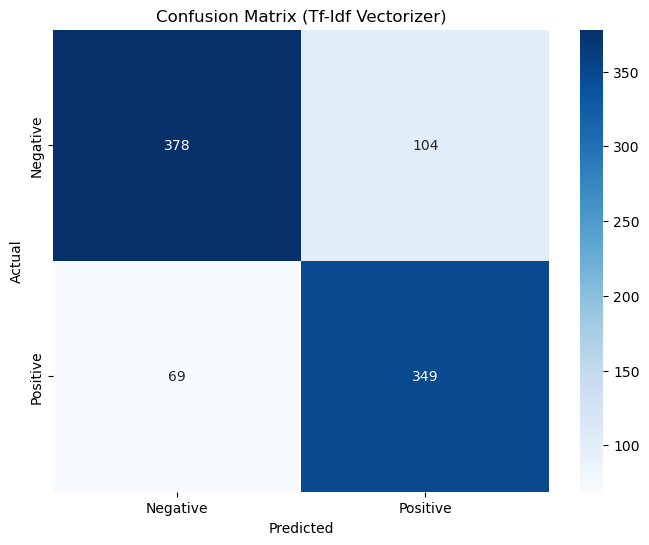

In [99]:
# calculate the confusion matrix of Tf-Idf model
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# plot
plot_confusion_matrix(cm_tfidf, "Tf-Idf")

##### Count vectorizer

In [100]:
# word frequency feature

best_params = grid_search_best_params(X_train, y_train, vectorizer_type='count')

count_vect = CountVectorizer(ngram_range=best_params['count__ngram_range'])
count_nb_model = MultinomialNB(alpha=best_params['nb__alpha'])

X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

# Perform 5-fold cross-validation
scores = cross_val_score(count_nb_model, X_train_count, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the model on the entire training set
count_nb_model.fit(X_train_count, y_train)

# Predict and evaluate the model on the test set
y_pred_count = count_nb_model.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
report_count = classification_report(y_test, y_pred_count)

print("Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy:", accuracy_count)
print(report_count)

Cross-Validation Scores: [0.84761905 0.81666667 0.82142857 0.81904762 0.81666667]
Mean Accuracy: 0.8242857142857142
Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy: 0.8033333333333333
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       482
           1       0.78      0.81      0.79       418

    accuracy                           0.80       900
   macro avg       0.80      0.80      0.80       900
weighted avg       0.80      0.80      0.80       900



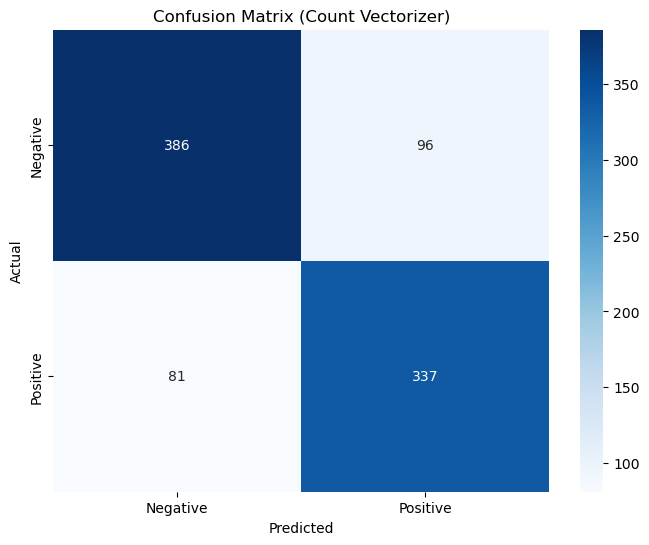

In [101]:
# calculate the confusion matrix of word frequency model
cm_count = confusion_matrix(y_test, y_pred_count)

# plot
plot_confusion_matrix(cm_count, "Count")

##### Using raw text data

In [102]:
# X-> data, y-> label
X = df["text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2100,) (900,) (2100,) (900,)


##### Tf-Idf vectorizer

Cross-Validation Scores: [0.82857143 0.81666667 0.8        0.82142857 0.79285714]
Mean Accuracy: 0.8119047619047619
Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       482
           1       0.79      0.80      0.80       418

    accuracy                           0.81       900
   macro avg       0.81      0.81      0.81       900
weighted avg       0.81      0.81      0.81       900



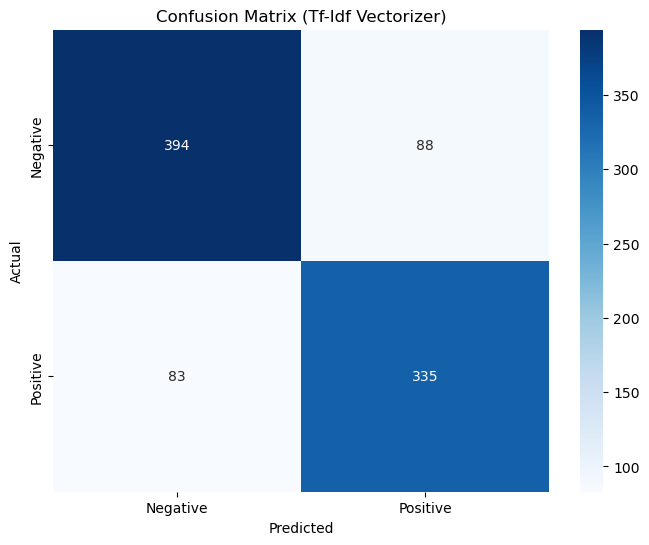

In [103]:
# Tf-Idf feature

best_params = grid_search_best_params(X_train, y_train, vectorizer_type='tfidf')

tfidf_vect = TfidfVectorizer(ngram_range=best_params['tfidf__ngram_range'])
tfidf_nb_model = MultinomialNB(alpha=best_params['nb__alpha'])

X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Perform 5-fold cross-validation
scores = cross_val_score(tfidf_nb_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the model on the entire training set
tfidf_nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate the model on the test set
y_pred_tfidf = tfidf_nb_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy:", accuracy_tfidf)
print(report_tfidf)

# calculate the confusion matrix of Tf-Idf model
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# plot
plot_confusion_matrix(cm_tfidf, "Tf-Idf")


##### Count vectorizer

Cross-Validation Scores: [0.8547619  0.81666667 0.79285714 0.82142857 0.79047619]
Mean Accuracy: 0.8152380952380952
Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy: 0.8188888888888889
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       482
           1       0.81      0.79      0.80       418

    accuracy                           0.82       900
   macro avg       0.82      0.82      0.82       900
weighted avg       0.82      0.82      0.82       900



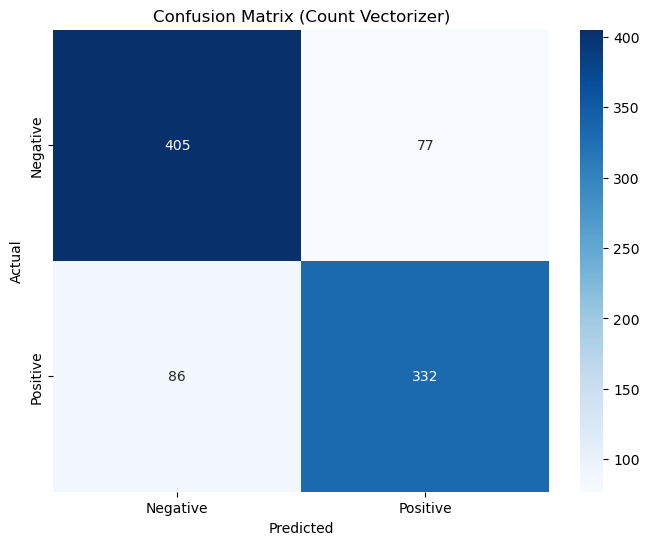

In [104]:
# word frequency feature

best_params = grid_search_best_params(X_train, y_train, vectorizer_type='count')

count_vect = CountVectorizer(ngram_range=best_params['count__ngram_range'])
count_nb_model = MultinomialNB(alpha=best_params['nb__alpha'])

X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

# Perform 5-fold cross-validation
scores = cross_val_score(count_nb_model, X_train_count, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Fit the model on the entire training set
count_nb_model.fit(X_train_count, y_train)

# Predict and evaluate the model on the test set
y_pred_count = count_nb_model.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
report_count = classification_report(y_test, y_pred_count)

print("Naive Bayes Classifier (TF-IDF Vectorizer) Accuracy:", accuracy_count)
print(report_count)

# calculate the confusion matrix of word frequency model
cm_count = confusion_matrix(y_test, y_pred_count)

# plot
plot_confusion_matrix(cm_count, "Count")

### Task 4
在這次作業中可以改變更有效率的地方：
1. 重複的程式碼可以用 function 替代，如圖表的繪製（在後續Task有試著利用fuction完成重複任務）
2. 同上，或許把所有function壓入 module 再 import 進來會更好 
3. 善用numpy和pandas的運算功能進行運算，減少loop使用。如在計算詞頻的時候：
    ```
    for j in range(0,X_counts.shape[1]):
        term_frequencies.append(sum(X_counts[:,j].toarray()))
    ```
    明顯比起 `np.asarray(X_counts.sum(axis=0))[0]`更加耗時！
4. Ex11 和 Ex14 同樣都需選出前 N 個高頻詞彙，但後者是以 pd.dataframe 的型態表示，因此短短一行僅用到`df.nlargest()`就完成了；反觀EX11是 np.array 還需要經過reverse等一堆步驟...或許下次該研究不同資料型態再下手
